# Movie Rating Analysis

If you're considering heading out to watch a movie, how reliable are the online reviews and ratings? This question becomes even more pertinent when the same company providing the ratings also profits from selling movie tickets. Is there a potential inclination for them to give movies higher ratings than they actually deserve?

## Goal:

**I aim to investigate whether Fandango's ratings in 2015 exhibited a tendency to rate movies more favorably in order to boost ticket sales.** 
Check out the following article for insights: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)

---


## Pt 1: The Data

These are the datasets accompanying the article, conveniently accessible on 538's GitHub repository: https://github.com/fivethirtyeight/data. These datasets consist of two CSV files. One file contains Fandango Stars and Displayed Ratings, while the other contains comprehensive data regarding movie ratings from alternate platforms such as Metacritic, IMDb, and Rotten Tomatoes.


#### all_sites_scores.csv
-----


`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and a minimum of 30 fan reviews on Fandango. The data from Fandango was extracted on Aug. 24, 2015.


Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**Imported libraries below:**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pt 2: Examining Fandango's Displayed Ratings vs. Actual User Ratings
To begin, I delved into the Fandango ratings to ascertain whether our analysis aligns with the findings presented in the article.

In [23]:
fandango = pd.read_csv("fandango_scrape.csv")

I explored dataframe properties and head

In [24]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [25]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [26]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


I investigated the correlation between a movie's popularity and its rating by generating a scatterplot that illustrates how ratings and the number of votes are interconnected.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

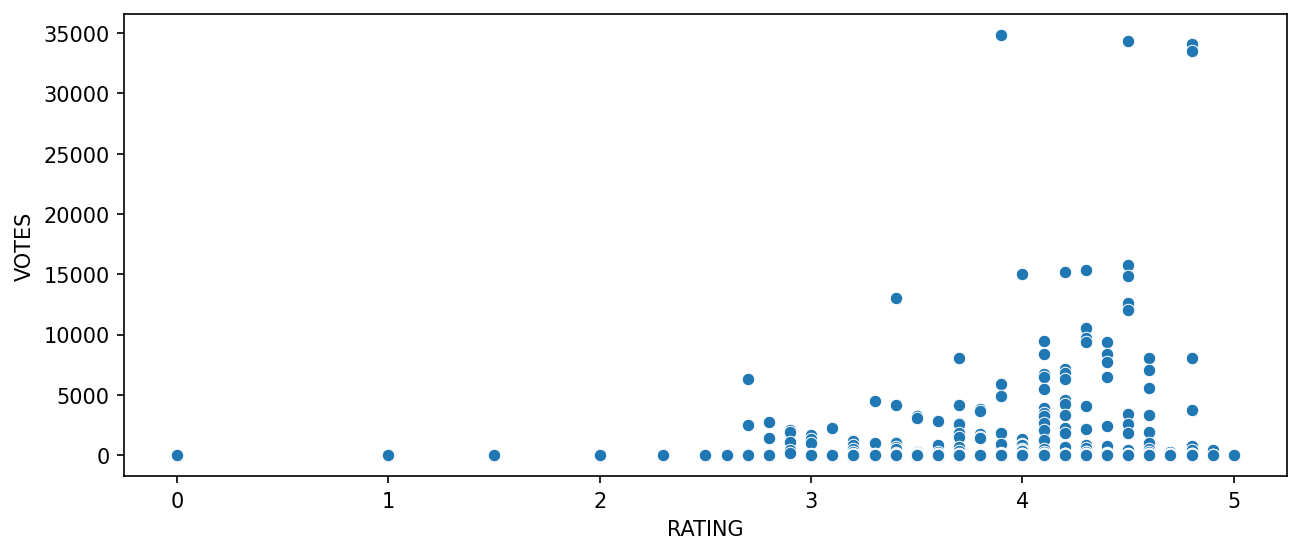

In [27]:
plt.figure(figsize=(10,4), dpi = 150)
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES')

Here I calculated the correlation between the columns.

In [28]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Given the assumption that each entry in the "FILM" column adheres to the format provided below:

    Film Title Name (Year)
    
I have generated a new column capable of extracting the year from the title strings and has been labeled as "YEAR."

In [29]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')', ''))

In [30]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

I visualized the count of movies per year with a plot

<AxesSubplot:xlabel='YEAR', ylabel='count'>

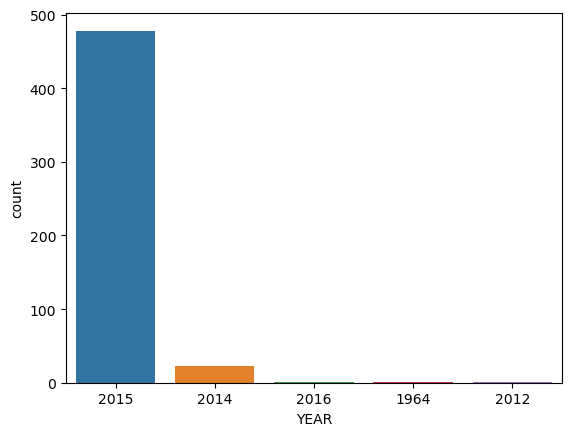

In [31]:
sns.countplot(data = fandango, x = 'YEAR')

The following list of movies comprises the top 10 titles based on the highest number of votes received.

In [32]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


69 of the movies in fandango data have zero votes

In [33]:
no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

I have created DataFrame of only reviewed films by removing any films that have zero votes.

In [34]:
fan_reviewed = fandango[fandango['VOTES'] > 0]

----
As mentioned in the article, the utilization of HTML and star rating displays might lead to a minor disparity between the actual user rating and the rating visible to users. We aim to visualize this variance in distributions for a clearer understanding.

I've generated a KDE plot, or potentially multiple KDE plots, to illustrate the distribution of displayed ratings (STARS) in comparison to the true ratings derived from votes (RATING). To ensure clarity, the KDEs have been clipped to the range of 0 to 5.

**KDE plot: True Rating vs. Stars Displayed**

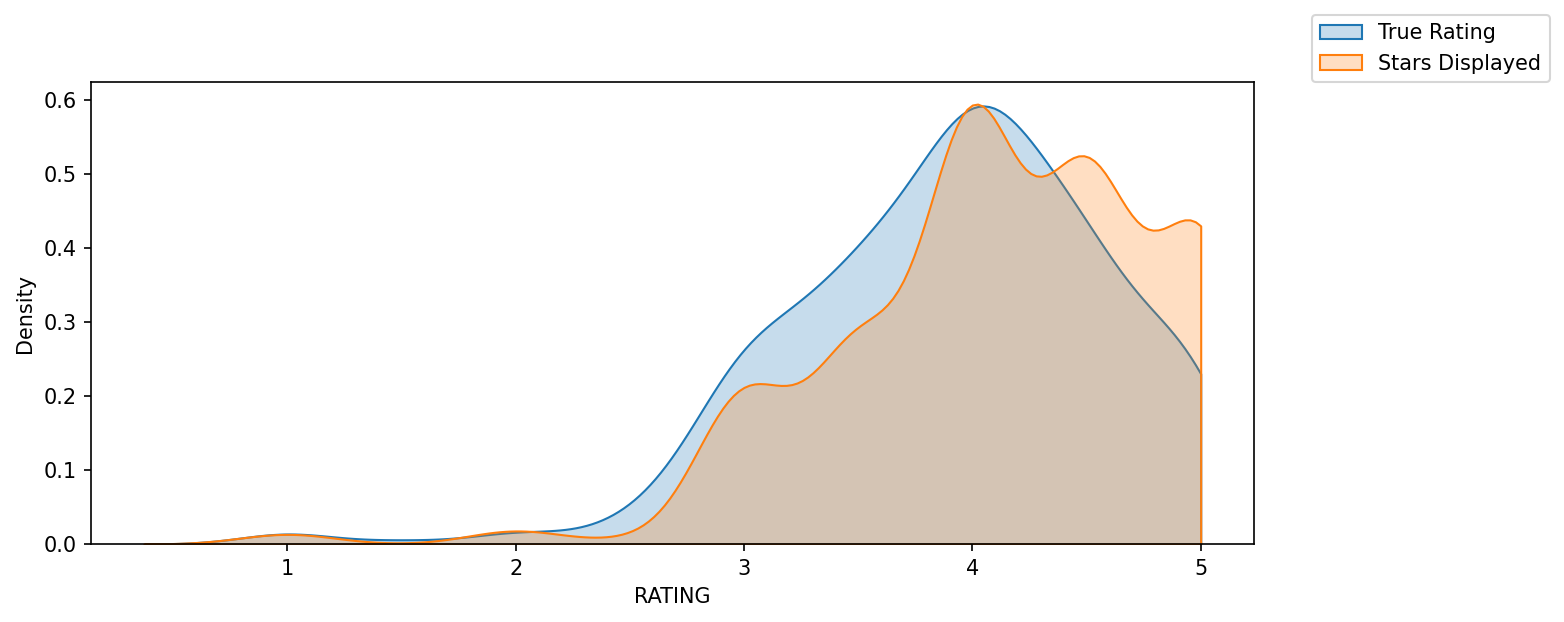

In [39]:
plt.figure(figsize = (10,4), dpi = 150)
sns.kdeplot(data = fan_reviewed, x= 'RATING', clip = [0,5], fill = True, label = 'True Rating')
sns.kdeplot(data = fan_reviewed, x= 'STARS', clip = [0,5], fill = True, label = 'Stars Displayed')
plt.legend(loc = (1.05, 1))

Subsequently, I quantified this discrepancy through the following steps:

Generated a new column representing the variance between the displayed STARS and the true RATING.
Calculated this variance using the formula STARS - RATING and rounded these differences to the nearest decimal point.

In [44]:
pd.options.mode.chained_assignment = None  # Disable the SettingWithCopyWarning

fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

In [45]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


I then created a count plot to display the number of times a certain difference occurs

**Count Plot: Number of Times a Certain Difference Occurs**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

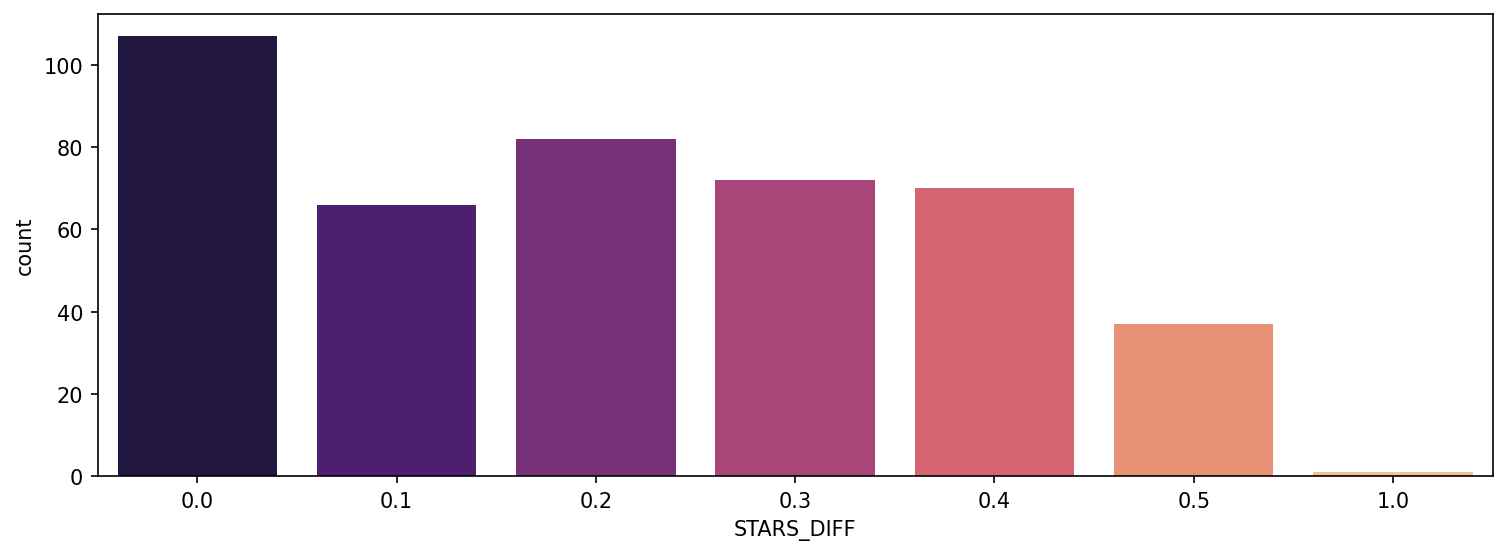

In [47]:
#CODE HERE
plt.figure(figsize=(12,4), dpi =150)
sns.countplot(data = fan_reviewed, x = 'STARS_DIFF', palette='magma')

The plot clearly indicates that one movie, namely "Turbo Kid" (2015), exhibited a deviation of more than 1 star between its displayed rating and the actual true rating.

In [49]:
fan_reviewed[fan_reviewed['STARS_DIFF'] >= 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Pt 3: Comparing Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

For this part, I needed to read in the "all_sites_scores.csv" file by running the cell below

In [50]:
all_sites = pd.read_csv("all_sites_scores.csv")

I explored the DataFrame columns, info, description for all_sites

In [51]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [52]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [53]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Rotten Tomatoes

First, let's direct our attention to Rotten Tomatoes. Rotten Tomatoes features two distinct sets of reviews: the critiques from their official critics and the reviews submitted by users.

I've crafted a scatterplot that delves into the correlation between RT Critic reviews and RT User reviews.

**Scatterplot: RT Critic Reviews vs. RT User Reviews**

(0.0, 100.0)

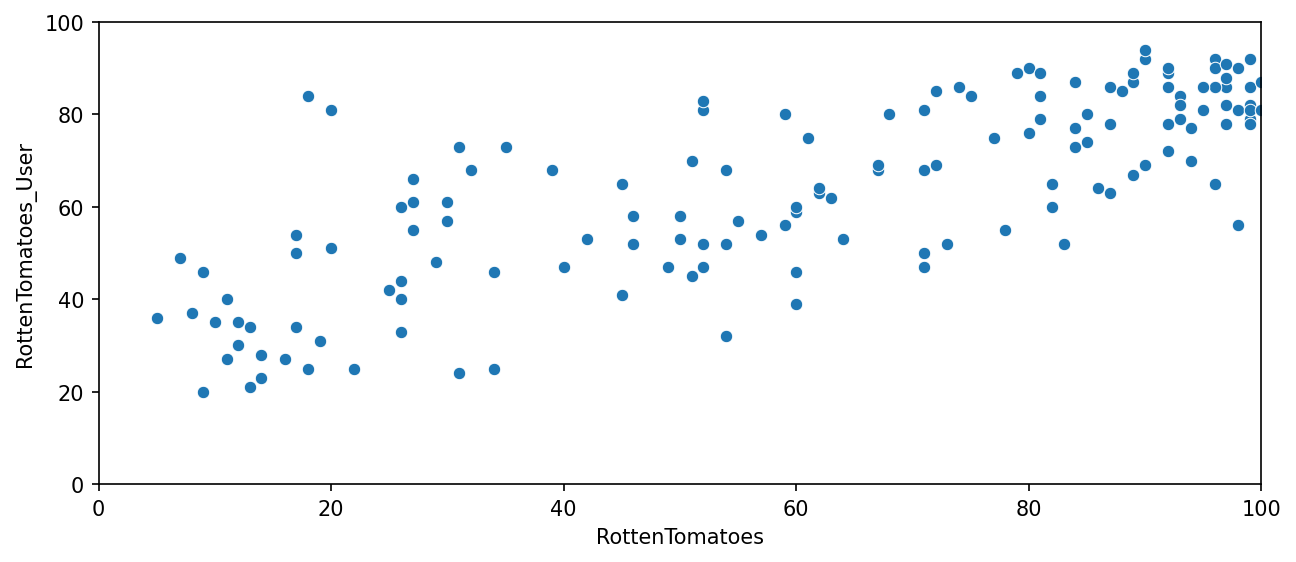

In [55]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

Subsequently, I proceeded to quantify this variation by contrasting the critics' ratings with the RT User ratings. This quantification was executed using the formula RottenTomatoes - RottenTomatoes_User. It's important to note that in this context, "Rotten_Diff" represents the difference between Critics and User Scores. Values closer to 0 signify agreement between Critics and Users, whereas larger positive values indicate that critics rated significantly higher than users. Conversely, larger negative values denote that users rated substantially higher than critics.

I've established a new column ['Rotten_Diff'] predicated on the disparity between critics' ratings and users' ratings for Rotten Tomatoes. This discrepancy has been computed using the formula RottenTomatoes - RottenTomatoes_User.

In [56]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Next, I conducted a comparison of the overall mean absolute difference between the critics' ratings and the user ratings.

The consideration of the average absolute disparity between critics' ratings and user ratings is important because it helps us understand the overall level of agreement or disagreement between these two perspectives. It helps us identify patterns in cases where the opinions diverge significantly or align closely, offering valuable insights into the dynamics of how different groups perceive and evaluate the same content.

In [58]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

I've visualized the distribution of the variances between RT Critics Score and RT User Score. This distribution plot includes negative values and employs either KDE or Histograms to effectively showcase the distribution pattern.

**KDE / Histogram plot: RT Critics Scores - RT User Score**

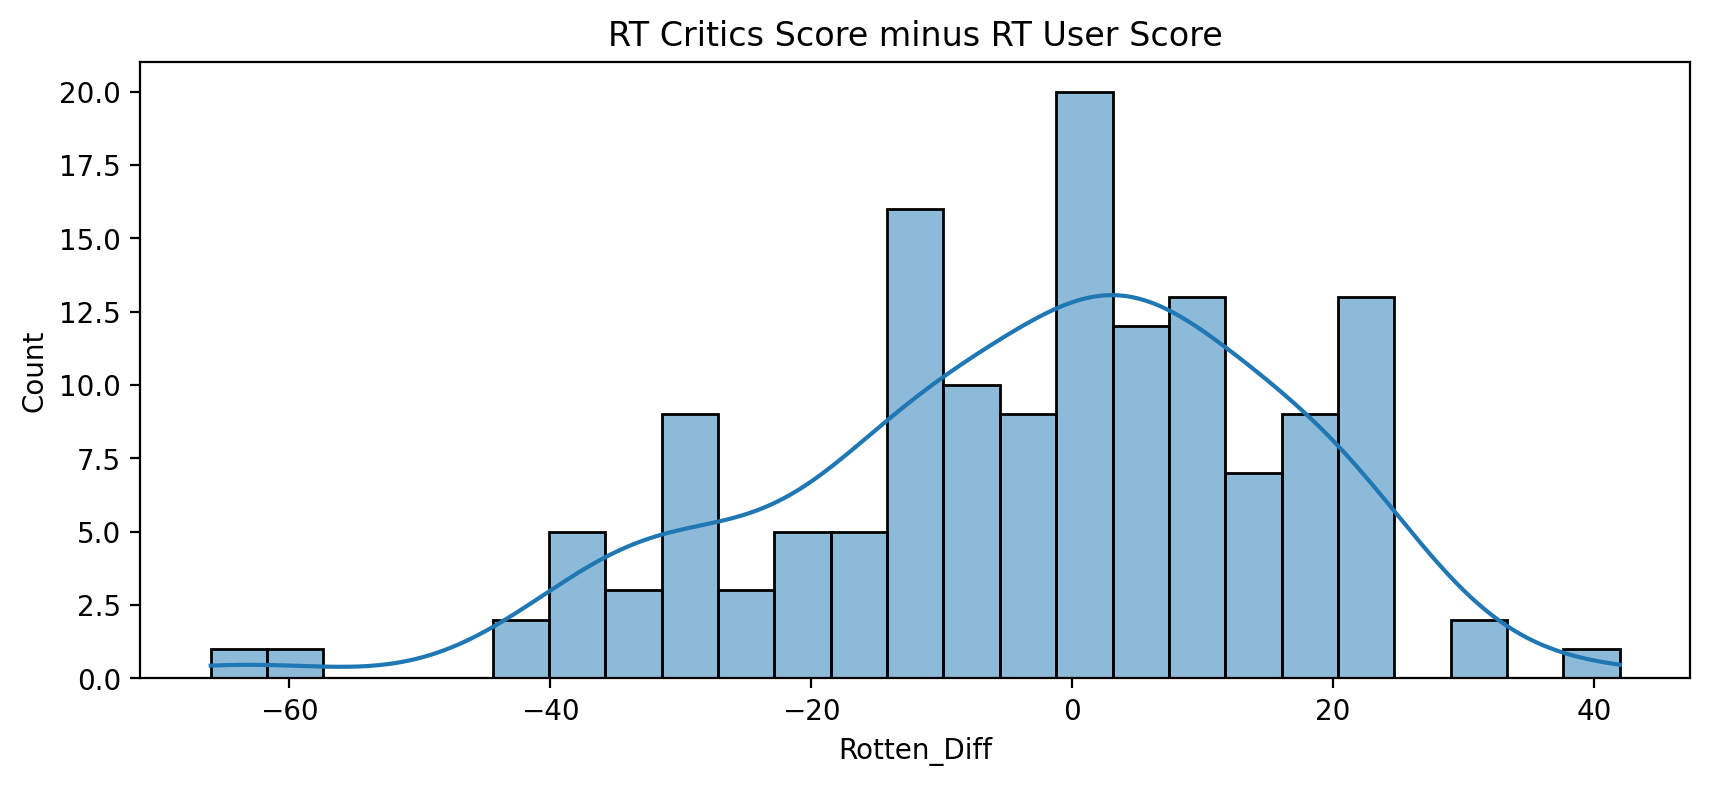

In [62]:
plt.figure(figsize=(10,4), dpi = 200)
sns.histplot(data = all_sites, x = 'Rotten_Diff', bins = 25, kde = True)
plt.title("RT Critics Score minus RT User Score");

Then created a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes

**KDE / Histogram plot: | RT Critics Scores - RT User Score |**

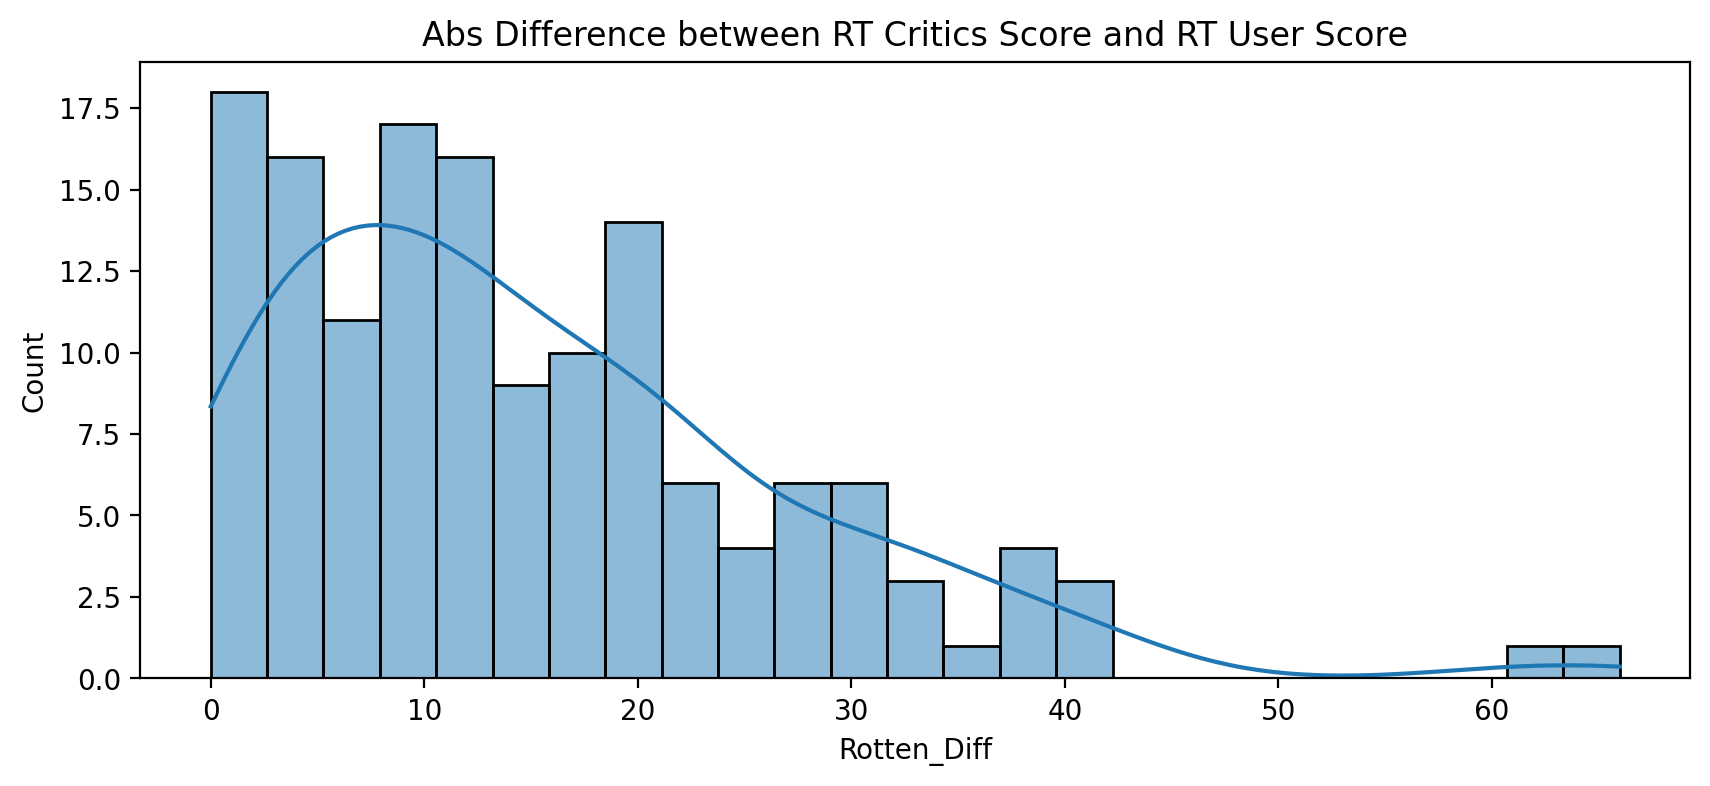

In [67]:
plt.figure(figsize=(10,4), dpi = 200)
sns.histplot(data = all_sites, x = all_sites['Rotten_Diff'].apply(abs), bins = 25, kde = True)
plt.title("Abs Difference between RT Critics Score and RT User Score");

Let's identify the movies responsible for the most significant differences. Initially, I have displayed the top 5 movies with the most substantial negative disparity between Users and RT critics. 

Since my calculation involves Critics Rating - Users Rating, noteworthy negative values indicate that users assigned notably higher average ratings to the movies compared to the critics.

**top 5 movies users rated higher than critics on average:**

In [71]:
print("Users Love but Critics Hate")
all_sites.nsmallest(5, 'Rotten_Diff')[['FILM',"Rotten_Diff"]]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**top 5 movies critics scores higher than users on average:**

In [72]:
print("Critics Love but Users Hate")
all_sites.nlargest(5, 'Rotten_Diff')[['FILM',"Rotten_Diff"]]

Critics Love but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now, let's shift our focus to the ratings from MetaCritic. Metacritic presents both an average user rating and their official displayed rating for content, allowing us to explore potential discrepancies between these two metrics.

**Scatterplot: the Metacritic Rating vs. the Metacritic User rating**

(0.0, 10.0)

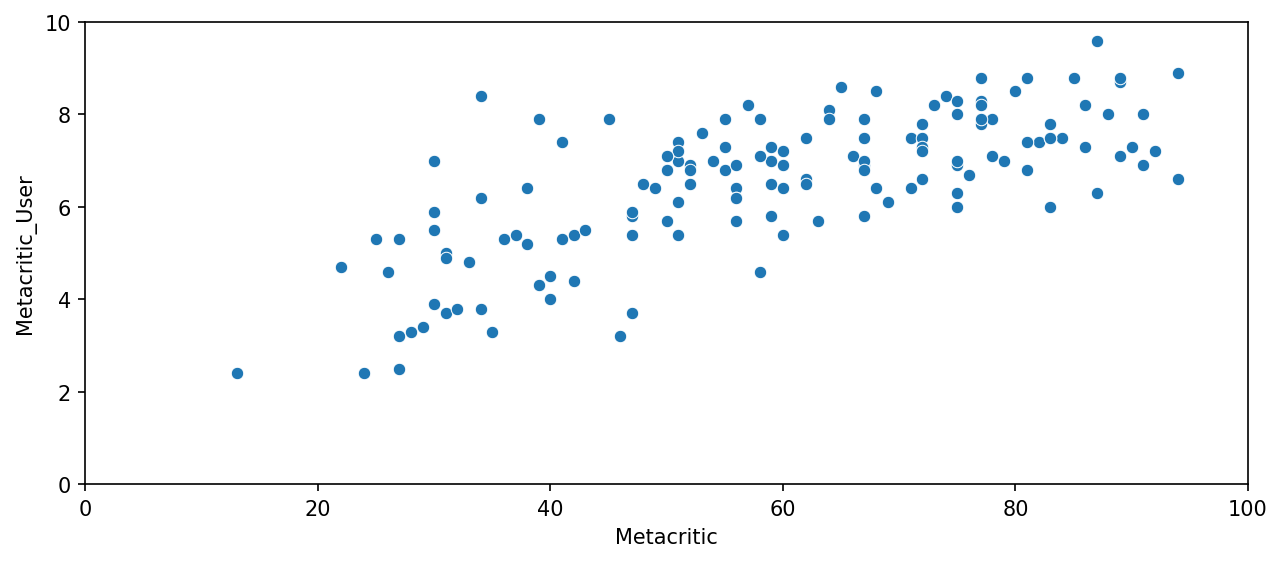

In [75]:
plt.figure(figsize=(10,4), dpi = 150)
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

Finally I have explored IMDB. Notice that both Metacritic and IMDB report back vote counts.

**Scatterplot: Vote Counts on MetaCritic vs. Vote Counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

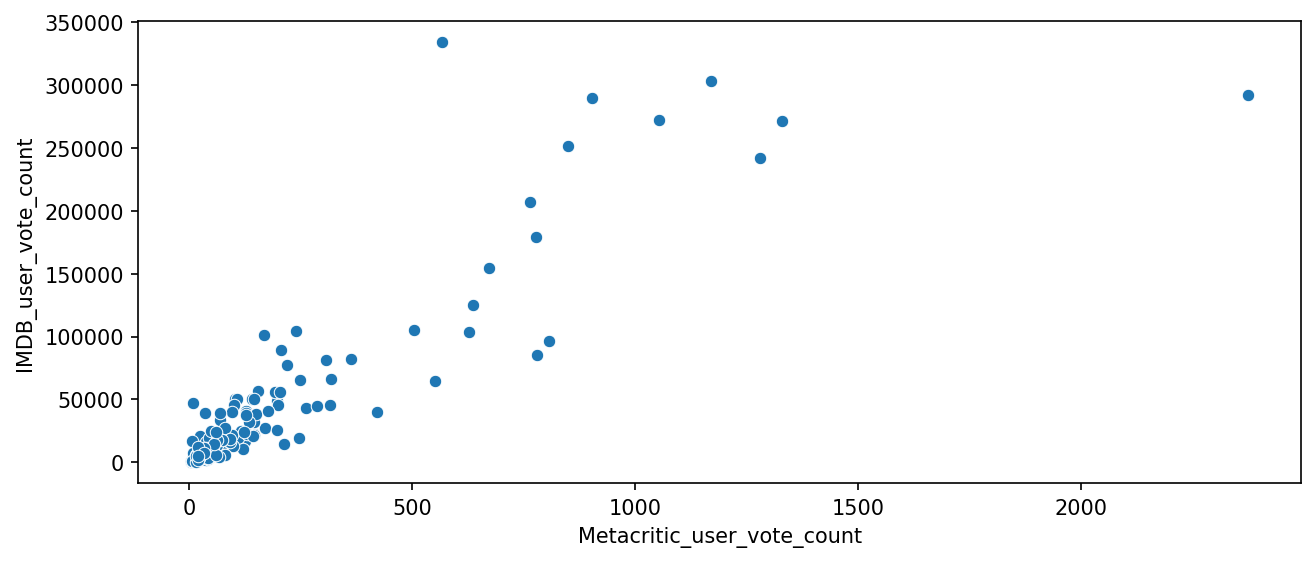

In [77]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

I've observed two outliers in the scatterplot where linear trends were expected. Interestingly, the movie "The Imitation Game," which boasts the highest vote count on IMDb, has only around 500 Metacritic ratings. This unexpected pattern is worth noting, as it deviates from the anticipated linear correlation.

In [80]:
all_sites.nlargest(1,'IMDB_user_vote_count')             

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


On the other hand, a movie with the highest Metacritic User Vote count is "Mad Max: Fury Road".

In [81]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Lastly, I have initiated an exploration into whether Fandango artificially inflates ratings to boost ticket sales, potentially displaying higher ratings than what might be warranted. This investigation will shed light on the practices and potential influences on their rating system.

I've merged the Fandango Table with the All Sites table. It's important to highlight that not every movie present in the Fandango table is included in the All Sites table. This discrepancy arises from the fact that certain Fandango movies have received minimal or no reviews. My objective was to solely compare movies that exist in both DataFrames. To achieve this, I conducted an inner merge, which brought together both DataFrames based on the FILM columns.

**Combined DataFrame Fandango & All Sites**

**NOTE: MERGE**
1. Inner Join (how='inner'):

Rows with matching keys in both DataFrames are included in the result.
If a key exists in one DataFrame but not in the other, the corresponding row is excluded from the result.
Only the common keys are retained.

2. Left Join (how='left'):

All rows from the left DataFrame are included in the result.
For keys that are only present in the left DataFrame, the corresponding columns from the right DataFrame will have missing values (NaN).
Rows with matching keys in the right DataFrame are also included.

3. Right Join (how='right'):

All rows from the right DataFrame are included in the result.
For keys that are only present in the right DataFrame, the corresponding columns from the left DataFrame will have missing values (NaN).
Rows with matching keys in the left DataFrame are also included.

4. Outer Join (how='outer'):

All rows from both DataFrames are included in the result.
For keys that are only present in one DataFrame and not the other, the corresponding columns from the missing DataFrame will have missing values (NaN).
Rows with matching keys in either the left or right DataFrame are included.
Here's a summary of how each how parameter affects the merged result:

5. Summary:
 
'inner': Only common keys are retained, and non-matching rows are excluded.
'left': All rows from the left DataFrame are included, and matching rows from the right DataFrame are added. Non-matching rows in the right DataFrame result in missing values.
'right': All rows from the right DataFrame are included, and matching rows from the left DataFrame are added. Non-matching rows in the left DataFrame result in missing values.
'outer': All rows from both DataFrames are included, and missing values are used for non-matching keys.

In [82]:
df = pd.merge(fandango, all_sites, on = "FILM", how = "inner")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [84]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

It's important to recognize that RT, Metacritic, and IMDB employ different rating scales than Fandango, which uses a 0-5 star system. To facilitate a fair comparison, I had to normalize these values, ensuring they all align within the 0-5 star range. This normalization ensures that the relative relationship between reviews remains consistent across platforms.

I've introduced new normalized columns for all ratings, ensuring they correspond to the 0-5 star scale exhibited on Fandango.

In [85]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/100 * 5, 1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/100 * 5 ,1)
df['Meta_Norm'] = np.round(df['Metacritic']/100 * 5, 1)

In [86]:
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/10 * 5, 1)
df['IMDB_Norm'] = np.round(df['IMDB']/10 * 5, 1)

In [87]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.1,2.9,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.1,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Following the normalization process, I've created a new DataFrame named norm_scores. This DataFrame exclusively encompasses the normalized ratings. It includes both the normalized STARS and RATING values from the original Fandango table, allowing for an organized representation of the normalized data.

In [89]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [90]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.1,2.9,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.1,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

Are Fandango's ratings unusually high? While we're aware of the tendency to inflate displayed RATING, we must determine if the actual ratings themselves stand above average.

To address this, I've crafted a plot that compares the distributions of normalized ratings across all the different sites. There exist various methods to accomplish this, and I explored the Seaborn KDEplot documentation to effectively visualize this data. 

In [91]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

**KDE Plot: STARS & RATING & Norms**

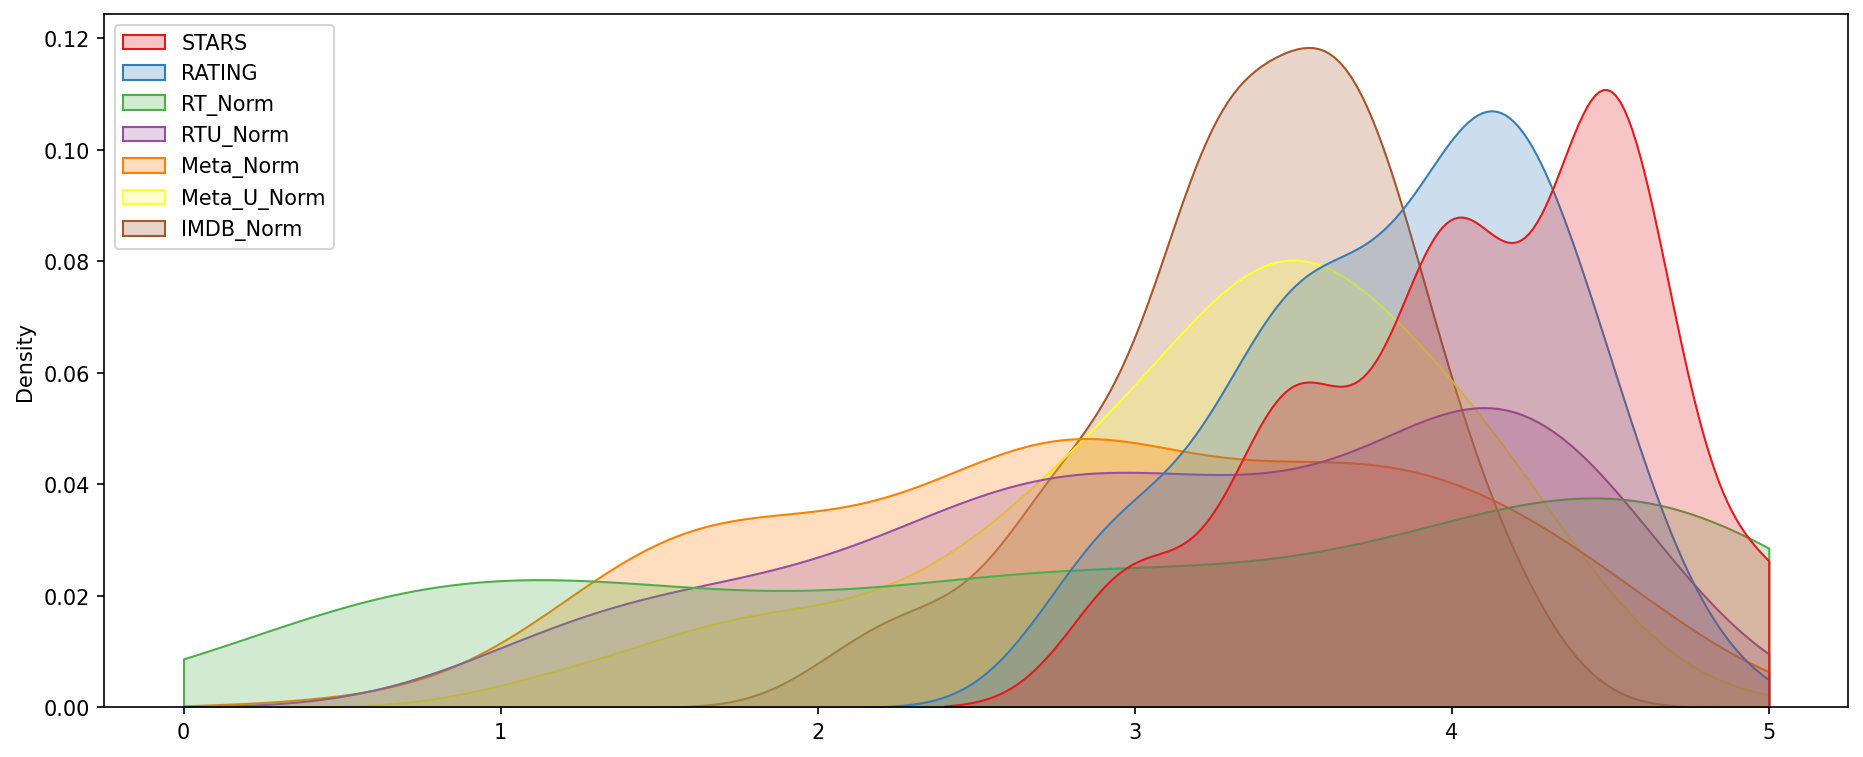

In [96]:
fig, ax = plt.subplots(figsize = (15,6), dpi =(150))
sns.kdeplot(data = norm_scores, clip = [0,5], shade = True, palette = 'Set1', ax = ax)
move_legend(ax, "upper left")

As evident from the depicted KDE plots, a notable observation arises. Fandango's distribution is notably skewed, displaying a propensity to assign higher ratings for both STARS and Rating, particularly leaning towards STARS. In contrast, I've noticed that the distribution of RT critics' ratings appears to be the most uniform across the platforms.

In light of this, I proceeded with a direct comparison of these two distributions. I've fashioned a KDE plot that meticulously contrasts the distribution of RT critic ratings against the STARS displayed by Fandango. This comparison sheds light on the distinct patterns and disparities between these two rating sources.

**KDE Plot: RT_Norms vs. STARS**

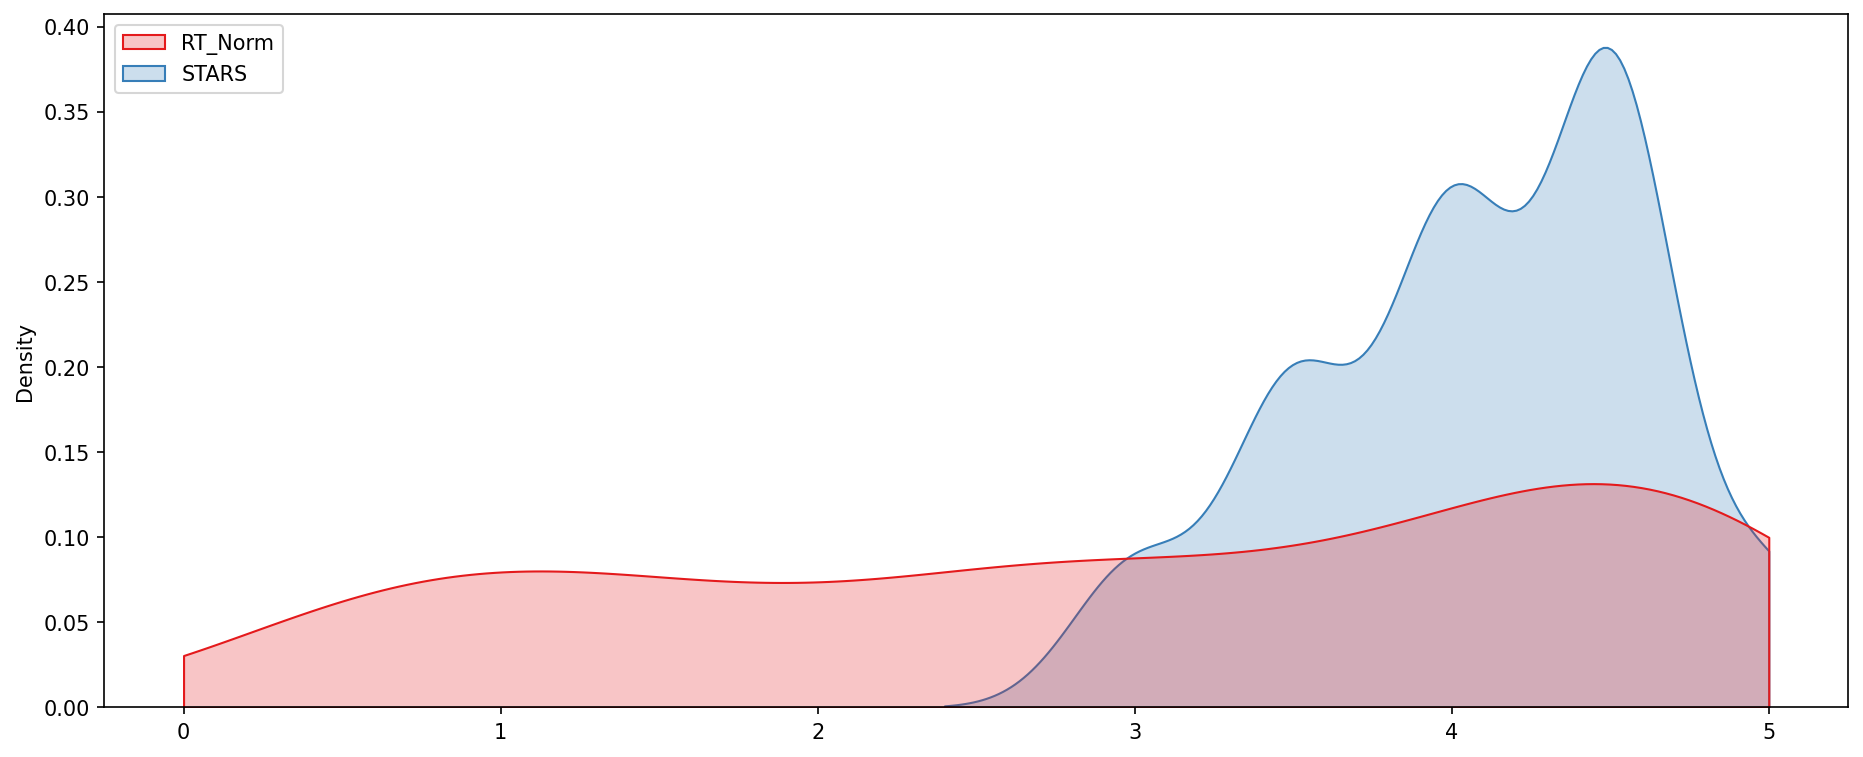

In [97]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data = norm_scores[['RT_Norm', 'STARS']], clip = [0,5], shade = True, palette = 'Set1', ax = ax)
move_legend(ax, "upper left")

**Histplot: All Normalized Scores**

<AxesSubplot:ylabel='Count'>

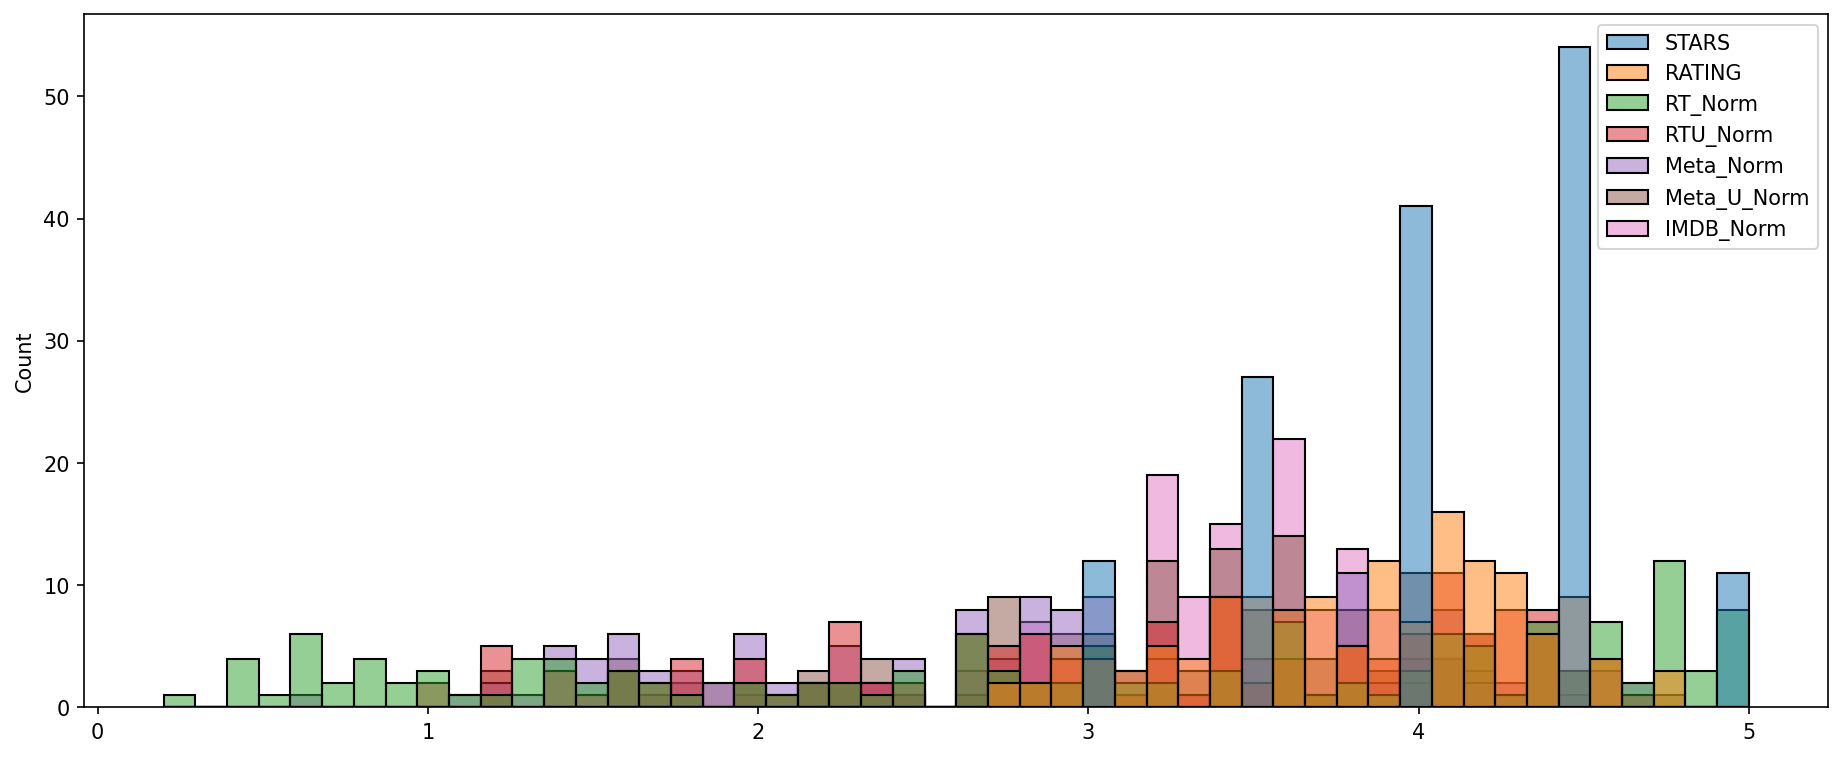

In [98]:
plt.figure(figsize=(15,6), dpi = 150)
sns.histplot(data = norm_scores, bins = 50)

### Analyzing Ratings for the Least Favorable Movies Across Platforms

To gain insight into how the worst-rated movies fare across different platforms, I've generated a clustermap visualization of all normalized scores. This visualization highlights variations in ratings, where highly rated movies should cluster together, while poorly rated movies might form their own clusters.

It's important to note that the clustermap does not necessitate FILM titles as the index, so I've omitted it for the clustermap. This visualization will provide a comprehensive overview of how the least favored movies' ratings compare across the various platforms.

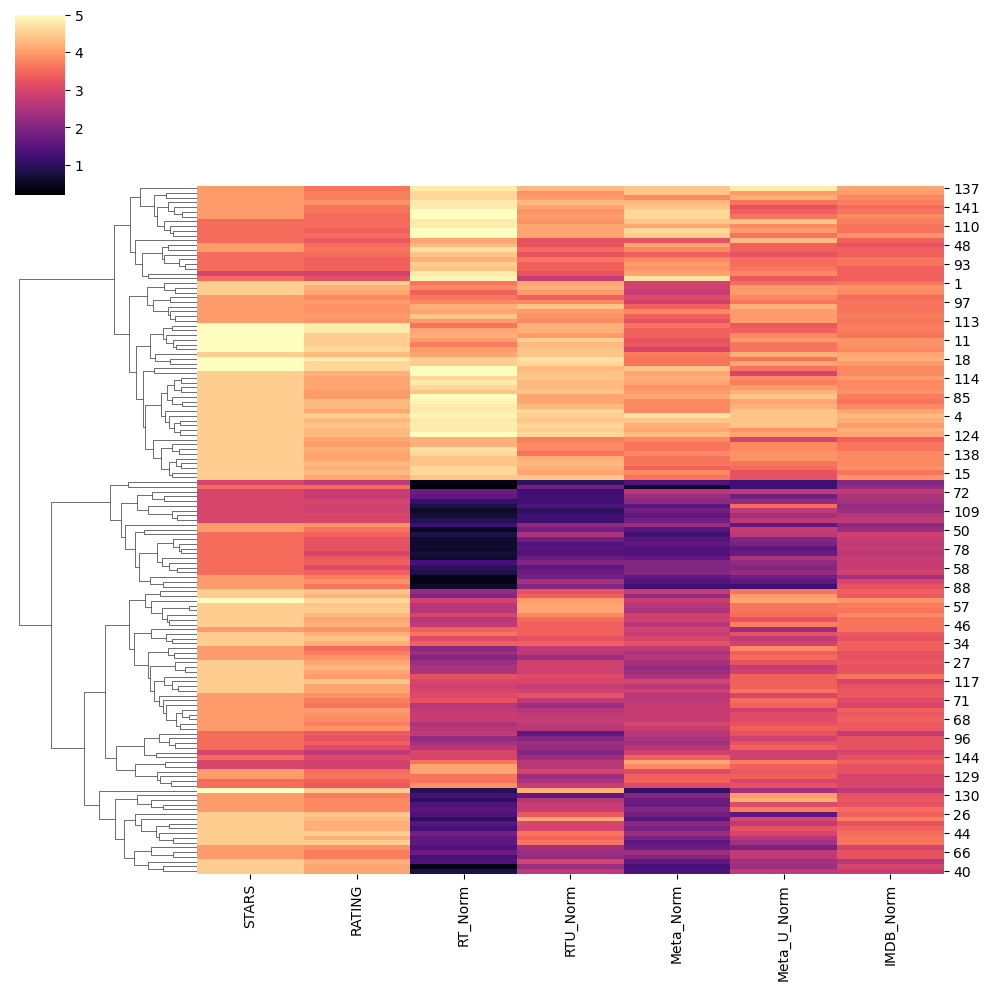

In [106]:
sns.clustermap(data = norm_scores, cmap ='magma', col_cluster = False)

Fandango's tendency to assign notably higher ratings than other sites is evident based on both KDE and Clustermap above, particularly considering its practice of rounding up ratings for display. To delve further into this observation, I conducted a detailed examination of the top 10 worst-rated movies based on Rotten Tomatoes Critic Ratings. This analysis sheds light on the extent of the rating disparities and provides specific insights into how Fandango's ratings compare with those of other platforms.

**New DataFrame: Norm_Film with Norm Scores and Film Names**

In [107]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [109]:
norm_films.nsmallest(10, 'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Subsequently, I've created visualizations to depict the distribution of ratings across all platforms for the top 10 worst-rated movies. This endeavor aims to provide a clearer understanding of the prevailing trends and disparities in ratings for these movies across different sources.

**KDE Plot: Ratings for RT Critic's 10 Worst Reviewed Films**

In [ ]:
# CODE HERE
plt.figure(figsize=(15,6),dpi=150)
worst_movies = norm_films.nsmallest(10, 'RT_Norm').drop('FILM', axis = 1)
sns.kdeplot(data=worst_movies,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

## Pt 4: Final Thoughts:

**A distinct pattern emerges from the analysis, revealing that Fandango consistently rates movies significantly higher than other platforms. This divergence becomes even more pronounced when considering Fandango's practice of rounding up ratings. This analysis prompts important considerations regarding the transparency and accuracy of the rating system, which has implications not only in the movie industry but across various sectors where product ratings directly influence sales. The need for a reliable and consistent rating mechanism is paramount to maintain trust and fairness in consumer decision-making.**